In [1]:
import numpy as np
import pandas as pd

# Try to clear dataset from http://dacon.io to Predicting sales of business

### Data files

You are provided with a transaction history of credit cards used at 1,990+ stores in S. Korea.

- `train.csv` : a transaction history of credit card sales  (01/08/2016 ~ 31/07/2018, 2 years).
 
- `test.csv` : same format with training data. The same store_id in this file and the train.csv doesn't mean that they are the same store. Each store has at least 5 days data per month.
 
- `submission.csv` : consists of two columns: store_id and total sales. **store_id** here is equivalent to the ‘store_id’ from the test.csv above.

### Data fields

- **store_id** - a unique id for each store, unique only in the same file. (stores may have been opened or closed in the middle)
- **date** - transacted date
- **time** - transacted time
- **card_id** - a unique hashed card number
- **amount** – amount(s) of sales / negative numbers (<0) for all the canceled transactions.
- **installments** - installments period in the month.
- **days_of_week** - 0 for Monday, 6 for Sunday
- **holiday** - 1 for the public holiday, 0 for otherwise.

## Mot vai ket luan:
- `FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison   mask |= (ar1 == a)`: có gì đó sai sai giữa Python và numpy
- DataFrame.info() : chỉ có thể xử lý một khoảng nào đó, nếu bản ghi quá lớn thì tính năng này vô dụng. BigData is coming.
- DataFrame.describe() sử dụng `Character code`: https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html. Nói chung thì có 3 option hữu ích:
    - include="O" 
    - include=None (default) 
    - include='all'

In [2]:
!ls Week_4_Pandas/1st_DataScience_Competition_data/

submission.csv test.csv       train.csv


In [3]:
train = pd.read_csv("Week_4_Pandas/1st_DataScience_Competition_data/train.csv", index_col=0)

/Users/anryseig/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
# Input data
train = pd.read_csv("Week_4_Pandas/1st_DataScience_Competition_data/train.csv")
train_copy = train.copy() # working with a copy to keep initial data

In [5]:
# check type of DataFrame
type(train_copy)

pandas.core.frame.DataFrame

In [6]:
# check shape
train_copy.shape

(3362796, 8)

In [7]:
# show first 10 indexes
train_copy.head(10)

store_id        date      time     card_id  amount  installments  \
0         0  2016-12-14  18:05:31  d297bba73f       5           NaN   
1         0  2016-12-14  18:05:54  d297bba73f      -5           NaN   
2         0  2016-12-19  12:42:31  0880849c05     144           NaN   
3         0  2016-12-19  12:48:08  8b4f9e0e95      66           NaN   
4         0  2016-12-19  13:31:08  7ad237eed0      24           NaN   
5         0  2016-12-19  13:36:39  30b1422f77      44           NaN   
6         0  2016-12-19  14:00:23  6dd8dad5ab     146           NaN   
7         0  2016-12-19  14:01:36  a4a425c5d2       6           NaN   
8         0  2016-12-19  14:09:46  f213c011fe     306           NaN   
9         0  2016-12-19  14:13:02  a185b7b11f      51           NaN   

   days_of_week  holyday  
0             2        0  
1             2        0  
2             0        0  
3             0        0  
4             0        0  
5             0        0  
6             0        0  
7             0        0  
8             0        0  
9             0        0

In [8]:
# show last 10 indexes
train_copy.tail(10)

store_id        date      time     card_id  amount  installments  \
3362786      1799  2018-07-10  18:00:55  560b85cb59     325           NaN   
3362787      1799  2018-07-11  11:57:34  fcf1b338aa     350           NaN   
3362788      1799  2018-07-15  18:24:57  b96ac1d7a8     275           NaN   
3362789      1799  2018-07-17  11:26:44  b7846c9389     350           NaN   
3362790      1799  2018-07-17  14:44:54  e73e0f0390     350           NaN   
3362791      1799  2018-07-19  17:58:31  e254bf70d9     600           NaN   
3362792      1799  2018-07-19  18:54:34  8f41c89891     275           NaN   
3362793      1799  2018-07-22  14:46:57  aeb64fe1fb     350           NaN   
3362794      1799  2018-07-25  18:09:13  57932602d6     300           NaN   
3362795      1799  2018-07-30  10:58:53  42d354807a     325           NaN   

         days_of_week  holyday  
3362786             1        0  
3362787             2        0  
3362788             6        0  
3362789             1        0  
3362790             1        0  
3362791             3        0  
3362792             3        0  
3362793             6        0  
3362794             2        0  
3362795             0        0

In [9]:
# get information about type of each column
train_copy.dtypes

store_id          int64
date             object
time             object
card_id          object
amount            int64
installments    float64
days_of_week      int64
holyday           int64
dtype: object

In [10]:
# overview all data
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
store_id        int64
date            object
time            object
card_id         object
amount          int64
installments    float64
days_of_week    int64
holyday         int64
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [11]:
# selecting some columns 
train_copy.loc[:, ['store_id', 'amount']].head()

store_id  amount
0         0       5
1         0      -5
2         0     144
3         0      66
4         0      24

## Two simpler ways to select culumns

In [12]:
# Single bracket
train_copy[['store_id', 'amount']].head()

store_id  amount
0         0       5
1         0      -5
2         0     144
3         0      66
4         0      24

In [13]:
# Dot accessor
train_copy.amount.head()

0      5
1     -5
2    144
3     66
4     24
Name: amount, dtype: int64

In [14]:
train_copy.dtypes

store_id          int64
date             object
time             object
card_id          object
amount            int64
installments    float64
days_of_week      int64
holyday           int64
dtype: object

In [15]:
train_copy.describe()

store_id        amount  installments  days_of_week       holyday
count  3.362796e+06  3.362796e+06  16860.000000  3.362796e+06  3.362796e+06
mean   8.323770e+02  1.459623e+02      3.459490  3.066320e+00  4.431283e-02
std    5.468544e+02  6.017306e+02      2.382382  1.976153e+00  2.057892e-01
min    0.000000e+00 -2.500000e+05      2.000000  0.000000e+00  0.000000e+00
25%    3.350000e+02  3.200000e+01      3.000000  1.000000e+00  0.000000e+00
50%    8.220000e+02  7.500000e+01      3.000000  3.000000e+00  0.000000e+00
75%    1.342000e+03  1.500000e+02      3.000000  5.000000e+00  0.000000e+00
max    1.799000e+03  2.500000e+05     36.000000  6.000000e+00  1.000000e+00

In [16]:
train_copy.describe(include='O')

date      time     card_id
count      3362796   3362796     3362796
unique         730     85924      922522
top     2018-04-21  12:41:45  53817035d4
freq          7736       157         835

In [17]:
train_copy.describe(include='all')

store_id        date      time     card_id        amount  \
count   3.362796e+06     3362796   3362796     3362796  3.362796e+06   
unique           NaN         730     85924      922522           NaN   
top              NaN  2018-04-21  12:41:45  53817035d4           NaN   
freq             NaN        7736       157         835           NaN   
mean    8.323770e+02         NaN       NaN         NaN  1.459623e+02   
std     5.468544e+02         NaN       NaN         NaN  6.017306e+02   
min     0.000000e+00         NaN       NaN         NaN -2.500000e+05   
25%     3.350000e+02         NaN       NaN         NaN  3.200000e+01   
50%     8.220000e+02         NaN       NaN         NaN  7.500000e+01   
75%     1.342000e+03         NaN       NaN         NaN  1.500000e+02   
max     1.799000e+03         NaN       NaN         NaN  2.500000e+05   

        installments  days_of_week       holyday  
count   16860.000000  3.362796e+06  3.362796e+06  
unique           NaN           NaN           NaN  
top              NaN           NaN           NaN  
freq             NaN           NaN           NaN  
mean        3.459490  3.066320e+00  4.431283e-02  
std         2.382382  1.976153e+00  2.057892e-01  
min         2.000000  0.000000e+00  0.000000e+00  
25%         3.000000  1.000000e+00  0.000000e+00  
50%         3.000000  3.000000e+00  0.000000e+00  
75%         3.000000  5.000000e+00  0.000000e+00  
max        36.000000  6.000000e+00  1.000000e+00

## Some aggregrate functions 

In [18]:
# Top 10 card_id visited
train_copy.card_id.value_counts().head(10)

53817035d4    835
93bba5079c    512
994b71a98a    458
18549044f3    453
6b2d18c5c5    433
10a5c30cda    425
06e61d93b8    423
5cf0b23473    413
0177959e09    409
a9a1e3d97d    405
Name: card_id, dtype: int64

In [19]:
train_copy['date'].max()

'2018-07-31'

In [20]:
train_copy['date'].min()

'2016-08-01'

In [22]:
train_copy['date'].idxmax()

TypeError: reduction operation 'argmax' not allowed for this dtype

In [23]:
train_copy['amount'].idxmax()

929470

In [24]:
train_copy.iloc[929470]

store_id               370
date            2017-01-02
time              12:02:05
card_id         1c492f54f0
amount              250000
installments             3
days_of_week             0
holyday                  0
Name: 929470, dtype: object

In [25]:
train_copy.iloc[929470:929475]

store_id        date      time     card_id  amount  installments  \
929470       370  2017-01-02  12:02:05  1c492f54f0  250000           3.0   
929471       370  2017-03-09  10:45:27  142895fc35    1040           3.0   
929472       370  2017-03-10  15:13:22  a911d3d2ba    3550          10.0   
929473       370  2017-03-20  19:42:46  1c492f54f0 -250000           3.0   
929474       370  2017-03-29  16:28:43  4420052bfd   15500          12.0   

        days_of_week  holyday  
929470             0        0  
929471             3        0  
929472             4        0  
929473             0        0  
929474             2        0

# Clearning  Processing
- Clean columns names: 
    Quy chuẩn lại tên các cột theo chuẩn đặt tên biến
- Extract and convert numeric values from string values: 
    Lấy hết các giá trị có thể tính toán, chuyển đổi sang dạng numeric
- Extract string data:
    - Correcting Bad Values: Xử lý lại lần nữa các dữ liệu object, loại bỏ trùng lặp
    - Phân tích các dữ liệu objects để đào thêm thông tin và lưu lại
- Work with missing values.

In [26]:
# Clearning Column Names 
train_copy.columns

Index(['store_id', 'date', 'time', 'card_id', 'amount', 'installments',
       'days_of_week', 'holyday'],
      dtype='object')

Column names có vẻ đã được chỉnh ngon, các data science có xu hướng sử dụng cùng dạng chuẩn tên, giống với cách đặt tên biến trong Python

In [27]:
train_copy.dtypes

store_id          int64
date             object
time             object
card_id          object
amount            int64
installments    float64
days_of_week      int64
holyday           int64
dtype: object

In [28]:
# Converting String Columns to Numeric 
train_copy.info() # Đoạn này ngu người. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
store_id        int64
date            object
time            object
card_id         object
amount          int64
installments    float64
days_of_week    int64
holyday         int64
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [29]:
train_copy.head()

store_id        date      time     card_id  amount  installments  \
0         0  2016-12-14  18:05:31  d297bba73f       5           NaN   
1         0  2016-12-14  18:05:54  d297bba73f      -5           NaN   
2         0  2016-12-19  12:42:31  0880849c05     144           NaN   
3         0  2016-12-19  12:48:08  8b4f9e0e95      66           NaN   
4         0  2016-12-19  13:31:08  7ad237eed0      24           NaN   

   days_of_week  holyday  
0             2        0  
1             2        0  
2             0        0  
3             0        0  
4             0        0

In [30]:
train_copy.installments.unique()

array([nan,  3.,  2.,  4.,  5., 10.,  6., 12.,  7.,  8.,  9., 22., 24.,
       18., 20., 15., 36.])

In [31]:
train_copy.store_id.unique()

array([   0,    1,    2, ..., 1797, 1798, 1799])

In [32]:
train_copy.card_id.unique()

array(['d297bba73f', '0880849c05', '8b4f9e0e95', ..., 'b96ac1d7a8',
       '8f41c89891', '42d354807a'], dtype=object)

In [33]:
# Dropping Missing Values
train_copy.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

`installments` có ý nghĩa khi để NaN, nên không drop. Bảng data này được clear từ ngay đầu nguồn.

# Visualization

In [42]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
#plt.rcParams["figure.figsize"] = [8, 6]

In [35]:
train_copy.head()

store_id        date      time     card_id  amount  installments  \
0         0  2016-12-14  18:05:31  d297bba73f       5           NaN   
1         0  2016-12-14  18:05:54  d297bba73f      -5           NaN   
2         0  2016-12-19  12:42:31  0880849c05     144           NaN   
3         0  2016-12-19  12:48:08  8b4f9e0e95      66           NaN   
4         0  2016-12-19  13:31:08  7ad237eed0      24           NaN   

   days_of_week  holyday  
0             2        0  
1             2        0  
2             0        0  
3             0        0  
4             0        0

In [36]:
# Get all store_id index
store_id = train_copy.store_id

In [37]:
# Total amount of each store
total = {}
for x in train_copy.store_id.unique():
    total[x] = train_copy[store_id == x]['amount'].sum()

<BarContainer object of 1775 artists>

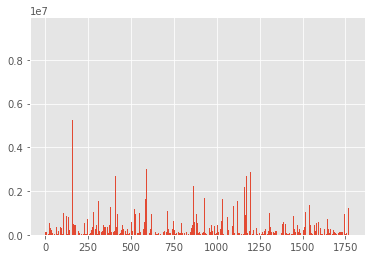

In [43]:
plt.bar(range(len(total)), list(total.values()))